https://en.wikipedia.org/wiki/Sensitivity_and_specificity

In [1]:
import pandas as pd 

In [2]:
#df = pd.read_csv('airfoil_self_noise.dat', delimiter=r'\s+')
df = pd.read_csv('airfoil_self_noise.dat', sep='\t',header=None)

In [3]:
df

,0,1,2,3,4,5
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461
...,...,...,...,...,...,...
1498,2500,15.6,0.1016,39.6,0.052849,110.264
1499,3150,15.6,0.1016,39.6,0.052849,109.254
1500,4000,15.6,0.1016,39.6,0.052849,106.604
1501,5000,15.6,0.1016,39.6,0.052849,106.224


In [4]:
df.head()

,0,1,2,3,4,5
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [5]:
df.columns=["Frequency","Angle of attack","Chord length","Free-stream velocity","Suction side","pressure level"]

In [6]:
df.head()

,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side,pressure level
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [7]:
df.isnull().sum()

Frequency               0
Angle of attack         0
Chord length            0
Free-stream velocity    0
Suction side            0
pressure level          0
dtype: int64

### First do train and test split 

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [10]:
X_train,X_test, y_train,y_test = train_test_split(
    X, y, test_size = 0.33, random_state = 42)

In [11]:
X_train.head()

,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side
845,500,11.2,0.0508,71.3,0.014072
1026,10000,4.8,0.0254,55.5,0.000873
621,2000,7.2,0.1524,39.6,0.009092
1371,630,6.7,0.1016,31.7,0.005929
195,6300,0.0,0.2286,71.3,0.002143


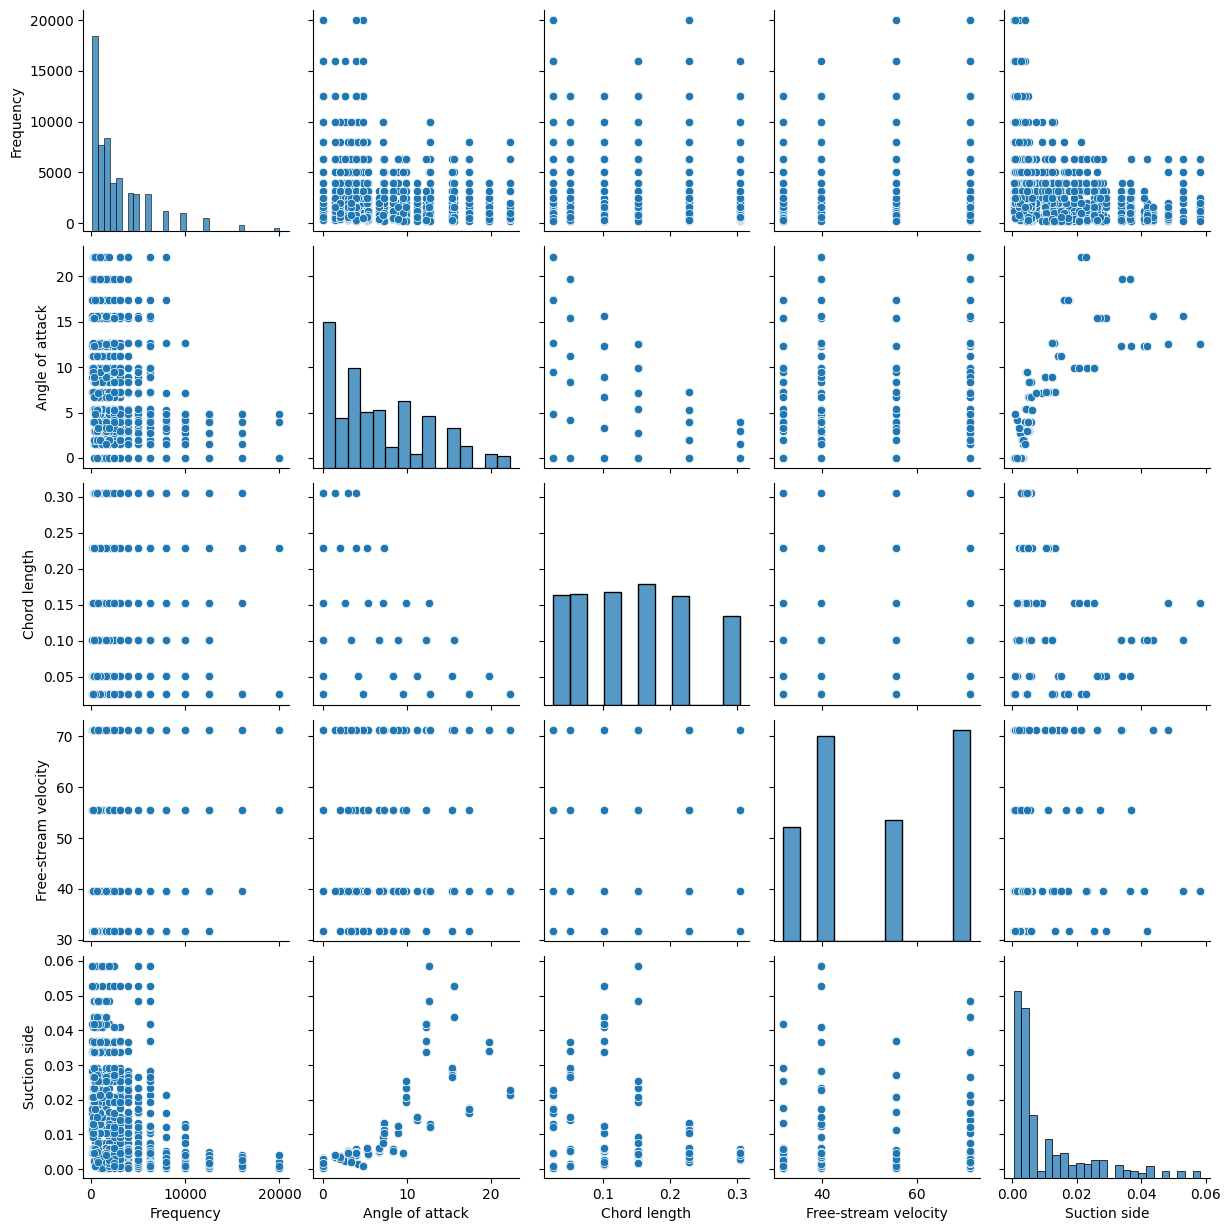

In [12]:
import seaborn as sns
sns.pairplot(X_train)

In [13]:
import matplotlib.pyplot as plt
X_train.corr()

,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side
Frequency,1.000000,-0.273327,-0.000324,0.125247,-0.239878
Angle of attack,-0.273327,1.000000,-0.498257,0.058603,0.762567
Chord length,-0.000324,-0.498257,1.000000,0.013061,-0.220849
Free-stream velocity,0.125247,0.058603,0.013061,1.000000,-0.000519
Suction side,-0.239878,0.762567,-0.220849,-0.000519,1.000000


<Axes: ylabel='Frequency'>

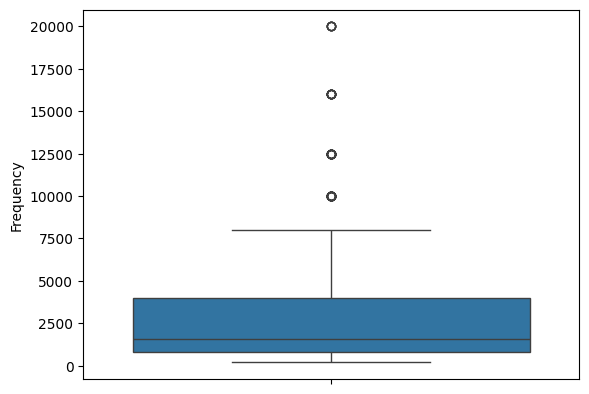

In [14]:
sns.boxplot(X_train['Frequency'])

<Axes: xlabel='Frequency', ylabel='pressure level'>

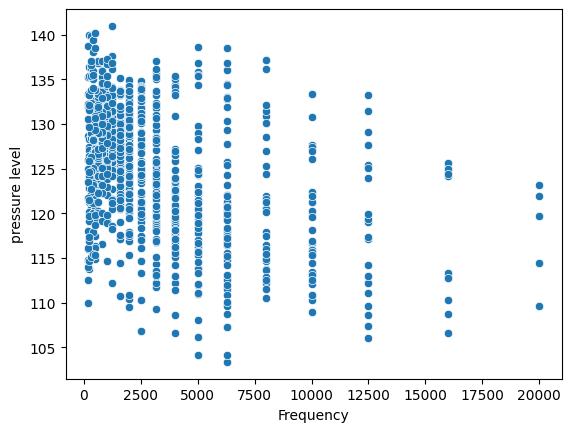

In [15]:
sns.scatterplot(x=X_train['Frequency'], y=y)

In [16]:
len(df['pressure level'].unique())

1456

<Axes: ylabel='pressure level'>

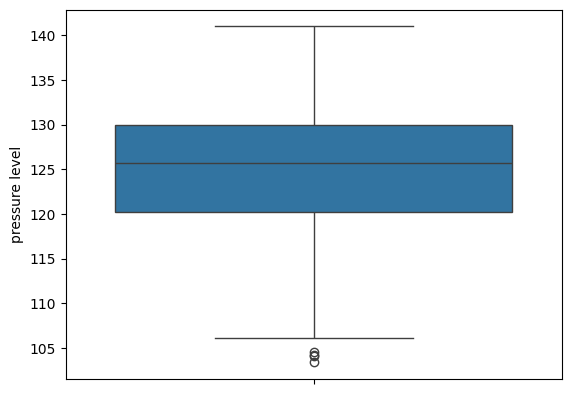

In [17]:
sns.boxplot(df['pressure level'])

In [18]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [19]:
import pickle
pickle.dump(regressor, open('model.pkl', 'wb'))

In [20]:
#!pip install flask

In [21]:
pickled_model = pickle.load(open('model.pkl', 'rb'))
pickled_model.predict(X_test)

array([124.06768512, 119.59316737, 120.29933092, 129.61912851,
       129.81089779, 132.61068301, 122.44438053, 126.7461602 ,
       129.99906397, 125.94601069, 132.50626617, 113.78942913,
       130.10151743, 132.51123677, 123.6412694 , 114.10666435,
       124.31679905, 126.6766228 , 129.24252599, 131.79580713,
       125.77675782, 125.02970619, 116.44955941, 129.88018679,
       124.2232864 , 124.67967727, 131.60657138, 124.57186337,
       115.76458243, 123.39652912, 125.13674229, 123.92018299,
       125.4841971 , 118.61796101, 121.70395495, 130.95730463,
       131.39243856, 128.29169206, 121.31077749, 117.99901537,
       126.41139865, 128.86175217, 126.44075781, 123.46463781,
       123.08590861, 130.13707376, 125.11244177, 120.01115538,
       123.19344296, 132.81698484, 128.72414835, 117.7903339 ,
       123.4283675 , 122.57110308, 126.71758509, 120.44811529,
       123.29741941, 128.68403927, 124.25898336, 123.22309466,
       125.44226349, 131.08621938, 126.73671008, 131.37

In [22]:
X_test.loc[51]

Frequency               400.000000
Angle of attack           0.000000
Chord length              0.304800
Free-stream velocity     31.700000
Suction side              0.003313
Name: 51, dtype: float64

In [23]:
dict_test={
    "Frequency":9,
    "Angle of attack":8,
    "Chord length":10,
    "Free-stream velocity":1,
    "Suction side":7
}

In [24]:
dict_test

{'Frequency': 9,
 'Angle of attack': 8,
 'Chord length': 10,
 'Free-stream velocity': 1,
 'Suction side': 7}

In [25]:
dict_test.values()

dict_values([9, 8, 10, 1, 7])

In [26]:
dict_test.keys()

dict_keys(['Frequency', 'Angle of attack', 'Chord length', 'Free-stream velocity', 'Suction side'])

In [31]:
[list(dict_test.values())]

[[9, 8, 10, 1, 7]]

In [33]:
pickled_model.predict([[400, 0, 4, 1, 7]])[0]

D:\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(-1059.9983000182272)

In [34]:
X_test

,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side
51,400,0.0,0.3048,31.7,0.003313
1465,1250,12.3,0.1016,31.7,0.041876
184,2500,4.0,0.3048,39.6,0.005796
1000,4000,0.0,0.0254,31.7,0.000439
746,5000,0.0,0.0508,55.5,0.000762
...,...,...,...,...,...
1295,1000,3.3,0.1016,71.3,0.002028
578,3150,5.4,0.1524,39.6,0.004850
352,1250,4.0,0.2286,31.7,0.005091
727,1250,0.0,0.0508,71.3,0.000740
